In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift

In [3]:
from PIL import Image

In [4]:
import cv2

In [5]:
size = 100, 100

In [6]:
img_names = ["shapes.png", "strawberry.png"]
ext_names = ["coins.png", "kiwi.png"]

In [7]:
images = [i for i in img_names]
ext_images = [i for i in ext_names]

In [8]:
def plot_three_images(figure_title, image1, label1,
                      image2, label2, image3, label3):
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.imsave('ms_' + figure_title, image2)
    plt.axis('off')
    plt.title(label2)

    # Display the third image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.imsave('ws_' + figure_title, image3)
    plt.axis('off')
    plt.title(label3)
    plt.savefig('all_' + figure_title)
    plt.show()

## Task 1 and Task 2

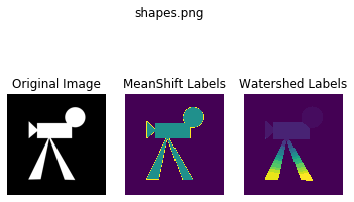

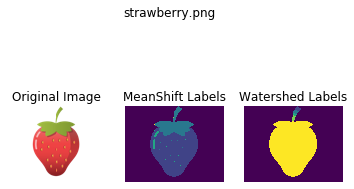

In [9]:
for img_path in images:
    img = Image.open(img_path)
    img.thumbnail(size)  # Convert the image to 100 x 100
    # Convert the image to a numpy matrix
    img_mat = np.array(img)[:, :, :3]
    # Task 1
    row, col = img_mat.shape[0], img_mat.shape[1] # Store the shape of original image
    # Extract the three RGB colour channels
    R = np.reshape(img_mat[:, :, 0].flatten(), (-1, 1))
    G = np.reshape(img_mat[:, :, 1].flatten(), (-1, 1))
    B = np.reshape(img_mat[:, :, 2].flatten(), (-1, 1))
    # Combine the three colour channels by flatten each channel then stacking the flattened channels together.
    img_stacked = np.concatenate((R, G, B), axis=1)
    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(img_stacked)
    # Reshape ms_labels back to the original image shape 
    ms_labels = np.reshape(ms_labels, (row, col))
    # Task 2
    # Convert the image to gray scale and convert the image to a numpy matrix
    img_gray = img.convert('L')
    img_array = np.array(img_gray)
    # Calculate the distance transform
    distance = ndi.distance_transform_edt(img_array)
    # Generate the watershed markers
    local_max = peak_local_max(distance, indices=False)
    markers = ndi.label(local_max)[0]
    # Perform watershed and store the labels
    ws_labels = watershed(-distance, markers, mask=img_array)
    # Plot
    plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")

## Task 3

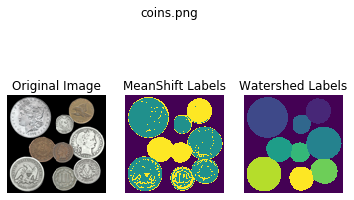

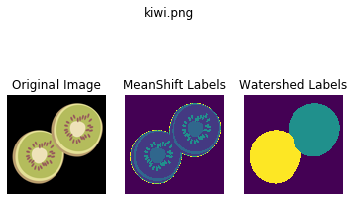

In [10]:
for img_path in ext_images:
    img = Image.open(img_path)
    img.thumbnail(size)
    # meanshift
    img_mat = np.array(img)[:, :, :3]
    row, col = img_mat.shape[0], img_mat.shape[1]
    R = np.reshape(img_mat[:, :, 0].flatten(), (-1, 1))
    G = np.reshape(img_mat[:, :, 1].flatten(), (-1, 1))
    B = np.reshape(img_mat[:, :, 2].flatten(), (-1, 1))
    img_stacked = np.concatenate((R, G, B), axis=1)
    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(img_stacked)
    ms_labels = np.reshape(ms_labels, (row, col))
    # watershed
    img_gray = img.convert('L')
    img_array = np.array(img_gray)
    thresh = cv2.threshold(img_array, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    distance = ndi.distance_transform_edt(thresh)
    local_max = peak_local_max(distance, min_distance=5, indices=False)
    markers = ndi.label(local_max, structure=np.ones((3, 3)))[0]
    ws_labels = watershed(-distance, markers, mask=thresh)
    plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")